In [1]:
import os
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Paths

In [15]:
num_selected_category = 1
num_selected_data_type = 1
available_categories = ["Shape", "Culture"]
available_data_types = ["train", "test"]
data_type = available_data_types[num_selected_data_type]
selected_category = available_categories[num_selected_category]
dataset_path = "D:/dataset"+selected_category
cla_file_path = os.path.join(dataset_path, "dataset.cla")

In [16]:
def obtain_models_classes(cla_file_path):
    """
    Takes the path to a .cla file and returns two lists. The returned categories list corresponds to a list of
    strings that contains the class values. The second list contains a set of arrays that contains the number of the
    models in the corresponding class.
    :param cla_file_path:
    :return: categories, model_lists
    """
    with open(cla_file_path) as f:
        arr = [line.replace("\n", "") for line in f]
    #print(arr)
    # Read from the .cla file the number of categories
    num_categories = int(arr[1].split(" ")[0])
    #print(num_categories)
    initial_index = 3# Index for starting to read in the .cla file
    categories = []
    model_lists = []
    for num_category in range(num_categories):
        # Add a class to the category list
        categories.append(arr[initial_index].split(" ")[0])
        # Read in the .cla file the number of models for that given class
        ## THIS ONE WAS MODIFIED FOR 2018 SUBSTITUTED SPLIT " " FOR "_"
        print('Initial index',arr[initial_index])
        num_models = int(arr[initial_index].split(" ")[-1])

        # Read the model numbers from the .cla file and save them in an array
        array_models = np.zeros(num_models, dtype=int)
        for num_model in range(num_models):
            array_models[num_model] = int(arr[initial_index + 1 + num_model].split('_')[-1])
        initial_index += num_models + 2
        model_lists.append(array_models)
    return categories, model_lists

In [17]:
# Load list of models per category
categories, model_lists = obtain_models_classes(cla_file_path)

# Create a dictionary of 
dictionary_objects = {}
for num_class, objects in enumerate(model_lists):
    for object_id in objects:
        dictionary_objects.update({int(object_id):[int(num_class),str(categories[num_class])]})
        
        
save_path = os.path.join(dataset_path,data_type+"_object_dictionary")
os.makedirs(save_path, exist_ok = True)
with open(os.path.join(save_path,'data_classes.json'), 'w') as outfile:
    json.dump(dictionary_objects, outfile)

Initial index CHANCAY 0 43
Initial index LURIN 0 319
Initial index MARANGA 0 15
Initial index NAZCA 0 5
Initial index PANDO 0 38
Initial index SUPE 0 28


In [18]:
with open(os.path.join(save_path,'data_dimensions.json')) as json_file:
    data_dimensions = json.load(json_file)
if data_type == "train":
    with open(os.path.join(save_path, 'data_classes.json')) as json_file:
        data_class = json.load(json_file)
else:
    data_class = None

In [19]:
joined_dictionary = {}
sorted_keys = np.sort([int(key) for key in data_dimensions.keys()])
sorted_keys = [str(key) for key in sorted_keys]
for key in sorted_keys:
    if data_class is None:
        object_dictionary = {"d1": data_dimensions[key][0],
                            "d2": data_dimensions[key][1],
                            "d3": data_dimensions[key][2],
                            "dmin": np.amin(data_dimensions[key]),
                            "dmax": np.amax(data_dimensions[key]),
                            "num_class": [],
                            "class": [],
                            "category": selected_category}
    else:
        object_dictionary = {"d1": data_dimensions[key][0],
                            "d2": data_dimensions[key][1],
                            "d3": data_dimensions[key][2],
                            "dmin": np.amin(data_dimensions[key]),
                            "dmax": np.amax(data_dimensions[key]),
                            "num_class": data_class[key][0],
                            "class": data_class[key][1],
                            "category": selected_category}
    joined_dictionary.update({int(key):object_dictionary})


In [20]:
joined_dictionary
with open(os.path.join(save_path,'data.json'), 'w') as outfile:
    json.dump(joined_dictionary, outfile)

In [21]:
df = pd.DataFrame.from_dict(joined_dictionary, orient = "index")

In [22]:
df

,d1,d2,d3,dmin,dmax,num_class,class,category
0,117.579201,42.644798,126.872803,42.644798,126.872803,[],[],Culture
1,50.326401,26.056890,51.453598,26.056890,51.453598,[],[],Culture
2,27.255199,58.000999,36.589401,27.255199,58.000999,[],[],Culture
3,32.636497,87.866798,52.709000,32.636497,87.866798,[],[],Culture
4,62.981499,133.443298,48.546700,48.546700,133.443298,[],[],Culture
...,...,...,...,...,...,...,...,...
184,171.521805,74.555603,169.499786,74.555603,171.521805,[],[],Culture
185,148.039505,83.505402,115.790100,83.505402,148.039505,[],[],Culture
186,118.180901,121.127998,142.475601,118.180901,142.475601,[],[],Culture
187,154.084900,72.813301,154.586212,72.813301,154.586212,[],[],Culture


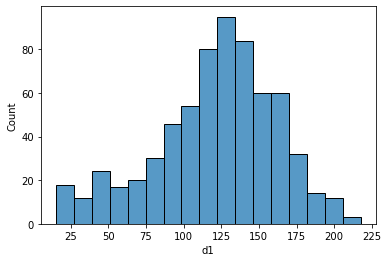

In [90]:
sns.histplot(df, x = "d1")

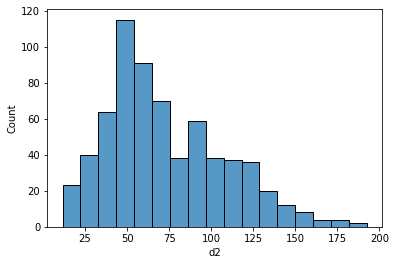

In [91]:
sns.histplot(df, x = "d2")

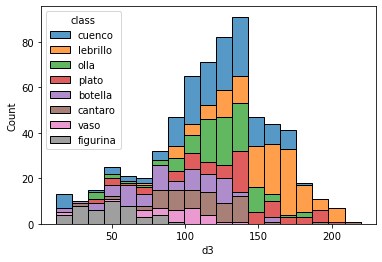

In [92]:
sns.histplot(df, x = "d3",hue = "class", multiple = "stack")

Text(0.5, 1.0, 'Minimum object size per Shape histogram')

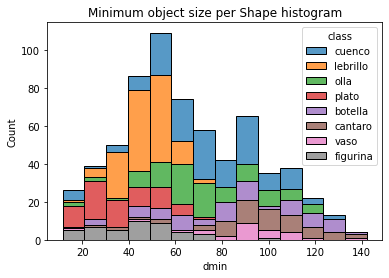

In [93]:
sns.histplot(df, x = "dmin",hue = "class", multiple = "stack")
plt.title("Minimum object size per "+selected_category+" histogram")

Text(0.5, 1.0, 'Maximum object size per Shape histogram')

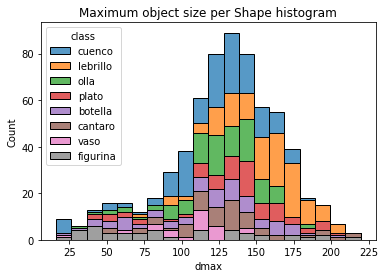

In [94]:
sns.histplot(df, x = "dmax", hue = "class", multiple = "stack")
plt.title("Maximum object size per "+selected_category+" histogram")

Text(0.5, 1.0, 'Proportion of classes Shape')

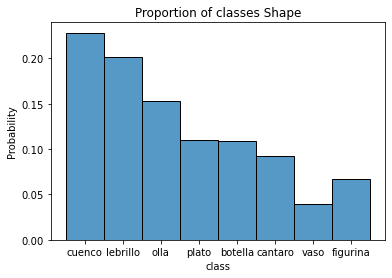

In [95]:

sns.histplot(df, x = "class", stat = "probability" )
plt.title("Proportion of classes "+selected_category)